In [3]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [12]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
btes = [[[[] for i in range(10)] for j in range(6)] for ii in range(7)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(res[i])
            #print(res, "hi")
            for j in range(i+1):
                btes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    #eta = [[] for i in range(10)]
    
    '''for j in range(10):
        for jj in range(j+1):
            #eta[j][jj] = err[jj][jj]/err[j][jj]
            eta[j].append(err[jj][jj]/err[j][jj])'''
    
    for j in range(10):
        for jj in range(10-j):
            btes[4][i][j].append(err[j][j]/err[jj+j][j])


#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[5][i][j].append(err[j][j]/err[jj+j][j]) 


for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            btes[6][i][j].append(err[j][j]/err[jj+j][j]) 


In [13]:
mean_eta = [[[] for i in range(10)] for j in range(7)]


for alg in range(7):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(btes[alg][i][j])
        
        tmp=tmp/6
        mean_eta[alg][j].append(tmp)

#print(mean_eta)

In [14]:
def plot_all(eta, mean_eta,alg_name):
    fig, ax = plt.subplots(3,3, figsize=(18,18))
    alg = 0
    #print(ax.shape)
    for j in range(2):
        for i in range(3):
            plot_te_all(fig, ax[j][i], alg_name[alg], eta[alg], mean_eta[alg], 10, 6)
            #print(j)
            alg += 1
    
    plot_te_all(fig, ax[2][0], alg_name[alg], eta[alg], mean_eta[alg], 10, 6)
    
    plt.show()
    plt.savefig('cifar-100-RTE1.pdf')

In [15]:
def plot_te_all(fig, ax, ttle, eta, mean_eta, n_tasks, n_alg):
    #fig, ax = plt.subplots(1,1, figsize=(8,8))
    #clr = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    #c = sns.color_palette(clr, n_colors=6)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            et[j,:] = np.asarray(eta[j][i])
            val = np.array(et[j,0])
            et[j,:] = et[j,:] + (1-val)
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            if j == 0:
                if i == 0:
                    ax.plot(ns, et[j,:], color='gray', alpha=0.3)
                else:
                    ax.plot(ns, et[j,:], color='gray', alpha=0.3)
            else:
                if i == 0:
                    ax.plot(ns, et[j,:], color='gray', alpha=0.3)
                else:
                    ax.plot(ns, et[j,:], color='gray', alpha=0.3)
    
    for j in range(0,n_alg):
        if j == 0:
            ax.scatter(10, 1, s = 5, color='gray', alpha=0.3)
        else:
            ax.scatter(10, 1, s = 5, color='gray', alpha=0.3)
    
    for i in range(n_tasks):
        ns = np.arange(i + 1, n_tasks + 1)
        ax.plot(ns, np.ravel(mean_eta[i]), color='black')
        
    ax.set_title(ttle, fontsize=20)
    ax.set_xlabel('Number of tasks seen', fontsize=18)
    ax.set_ylabel('Reverse Transfer Efficiency', fontsize=18)
    ax.set_ylim(.7, 1.2)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc='upper left', fontsize=12)
    #ax.set_yticks([.5,.6,.7,.8,.9,1, 1.1, 1.2, 1.3])
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=14)
    ax.grid(axis='x')
    plt.tight_layout()
    
    #plt.savefig('cifar-100-RTLE.pdf')

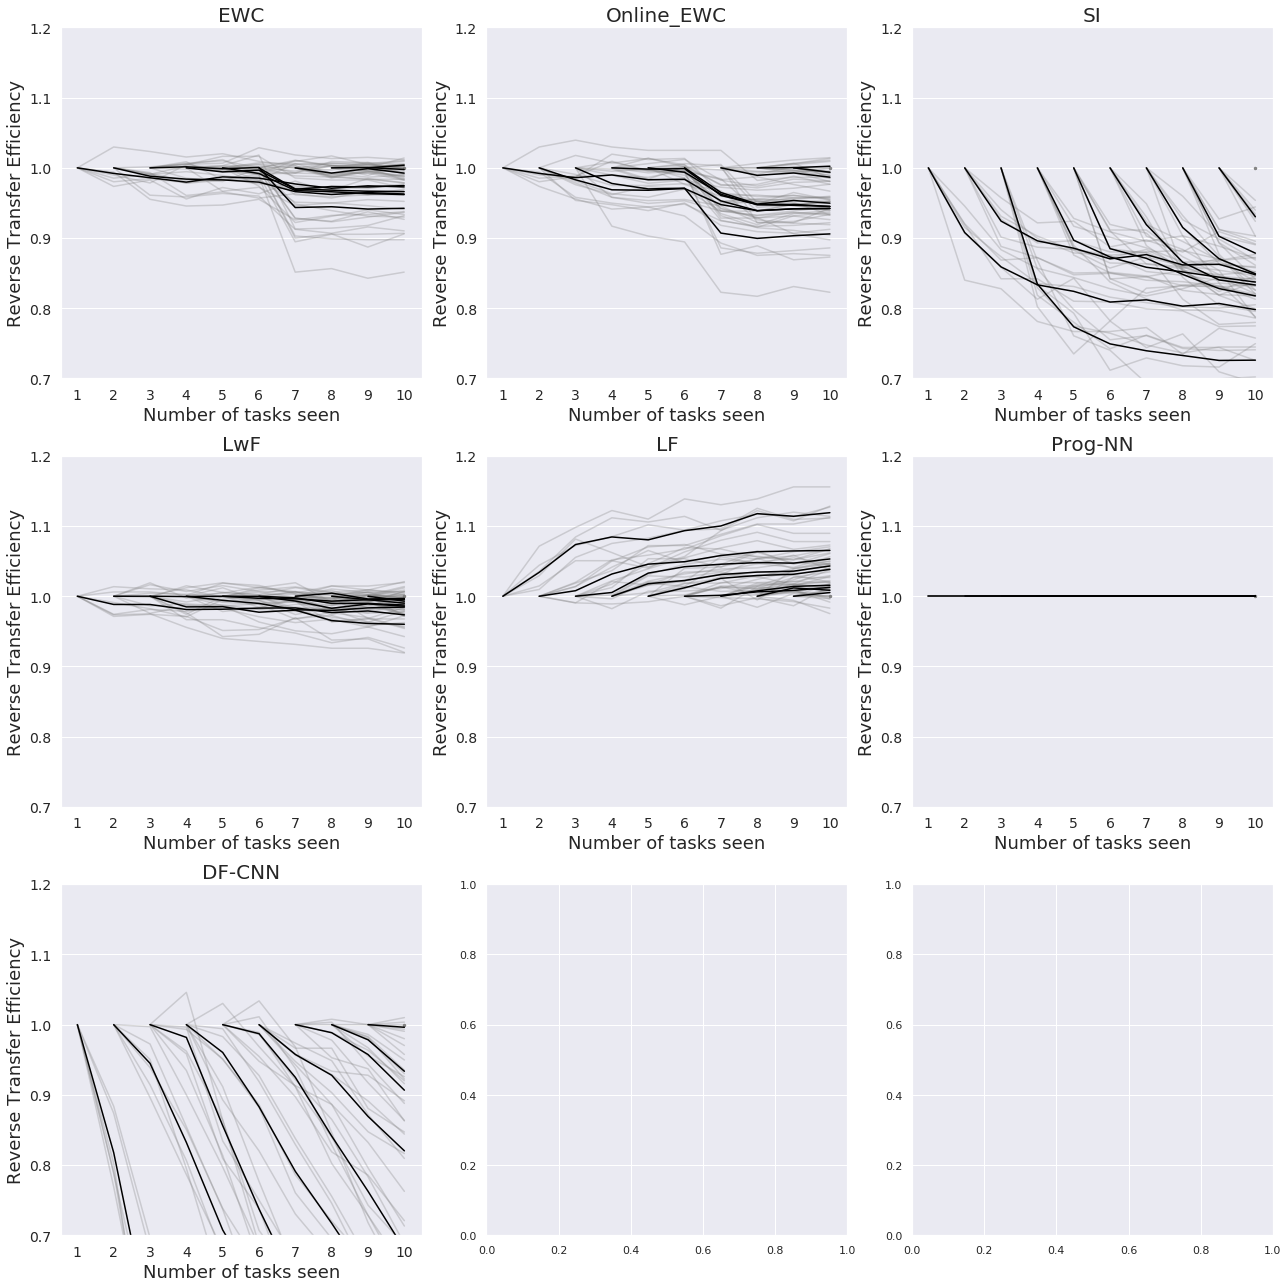

<Figure size 432x288 with 0 Axes>

In [16]:
plot_all(btes, mean_eta, ["EWC", "Online_EWC", "SI", "LwF", "LF", "Prog-NN", "DF-CNN"])

In [17]:
def plot_rte_all(ttle, eta, std, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(11.5,8))
    clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    c = sns.color_palette(clr, n_colors=n_alg)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            et[j,:] = np.asarray(eta[j][i])
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            sd = np.asarray(std[j][i])
            #print(et[j,:]+1.96*sd/np.sqrt(6))
            if j == 0:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j], linewidth = 3)
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
                else:
                    ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
            else:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j])
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
                else:
                    ax.plot(ns, et[j,:], c=c[j])
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
    
    
    ax.set_title(ttle, fontsize=28)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
    ax.set_xlabel('Number of tasks seen', fontsize=26)
    ax.set_ylabel('Backward Transfer Efficiency', fontsize=26)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc='upper left', fontsize=26)
    ax.set_yticks([.4,.6,.8,.9,1, 1.1])
    ax.set_ylim(0.85, 1.15)
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=20)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-100-RTE.png',dpi=500)

In [18]:
#calculate the std
std_dev = [[[] for i in range(10)]  for ii in range(7)]

for alg in range(7):
    for task in range(10):
        tmp = np.zeros((cv,10-task),dtype=float)
        
        for cv_ in range(cv):
            tmp[cv_,:] = btes[alg][cv_][task]
        std_dev[alg][task].append(np.std(tmp, axis=0))
        
#print(std_dev)

In [19]:
std_dev_ = [std_dev[4],std_dev[6],std_dev[1],std_dev[0],std_dev[2],std_dev[3],std_dev[5]]
                                                                                            
#print(std_dev_)

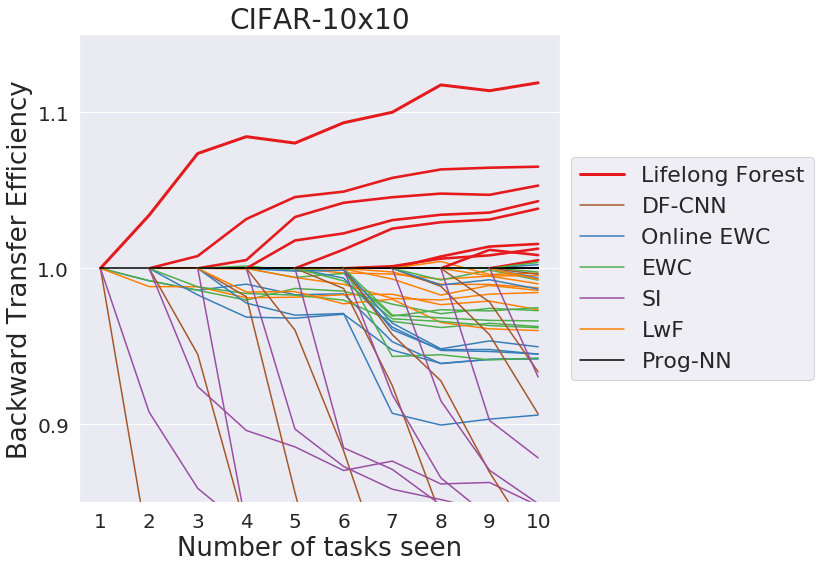

In [20]:
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
mean_rte = [mean_eta[4], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

plot_rte_all('CIFAR-10x10',mean_rte,std_dev_,10,7,names)

In [21]:
btes[0]

[[[1.0,
   0.9735202492211837,
   0.9827044025157232,
   0.9556574923547401,
   0.9720062208398134,
   0.963020030816641,
   0.9811616954474097,
   0.9645061728395061,
   0.9615384615384615,
   0.9615384615384615],
  [1.0,
   1.0013679890560876,
   1.0054945054945055,
   0.9945652173913043,
   0.991869918699187,
   1.0027397260273974,
   0.9878542510121457,
   0.9838709677419355,
   0.9786096256684492],
  [1.0,
   0.9852941176470588,
   0.9804878048780488,
   1.0,
   0.9885245901639345,
   0.9869067103109657,
   0.9836867862969004,
   0.9836867862969004],
  [1.0,
   0.9955555555555554,
   0.9940828402366864,
   0.9926144756277694,
   1.009009009009009,
   1.0074962518740629,
   1.0044843049327352],
  [1.0,
   0.9823008849557522,
   1.0060422960725075,
   0.9925484351713858,
   0.9925484351713858,
   0.9823008849557522],
  [1.0,
   1.0109034267912773,
   1.0030911901081916,
   0.995398773006135,
   0.9969278033794163],
  [1.0, 0.9853896103896104, 0.9950819672131147, 0.9837925445705025],

> Code for forward tranfer efficiency plot

In [22]:
#calculate average single task error
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [23]:
err = unpickle('./crossval_res_singletask/DF_CNN10__2.pickle')
print(err[99])

[0.734, 0.12, 0.092, 0.104, 0.101, 0.099, 0.077, 0.086, 0.098, 0.101, 0.1612]


In [24]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
fte_avg = np.zeros((7,10),dtype=float)
fte = [[[] for i in range(6)] for j in range(7)]

for ii,alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = unpickle(filename)
            fte[ii][cv_].append(mean_single_err[task]/err[task])
            fte_avg[ii][task] += mean_single_err[task]/err[task]
        fte_avg[ii][task] = fte_avg[ii][task]/6

In [25]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

array([0.62033333, 0.67133333, 0.59883333, 0.65183333, 0.60766667,
       0.59033333, 0.5555    , 0.61483333, 0.654     , 0.57133333])

In [26]:
for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res/'+'LF__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(mean_single_error_LF[task],err[task][task],task)
        fte[4][cv_].append(mean_single_error_LF[task]/err[task][task])
        fte_avg[4][task] += mean_single_error_LF[task]/err[task][task]
    fte_avg[4][task] = fte_avg[4][task]/6
        
fte_avg[4]

array([1.00041878, 1.03049647, 1.05124343, 1.0882666 , 1.0762054 ,
       1.10943181, 1.12196847, 1.15510691, 1.12943649, 1.15757975])

In [27]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [28]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for cv_ in range(cv):
    filename = './crossval_res/Prog_NN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for task in range(tasks):
        #print(fte[5][cv_])
        fte[5][cv_].append(mean_single_err_2[1][task]/err[task][task])
        fte_avg[5][task] += mean_single_err_2[1][task]/err[task][task]
        
fte_avg[5] = fte_avg[5]/6


for cv_ in range(cv):
    filename = './crossval_res/DF_CNN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    for task in range(tasks):
        fte[6][cv_].append(mean_single_err_2[0][task]/err[task][task])
        fte_avg[6][task] += mean_single_err_2[0][task]/err[task][task]
        
fte_avg[6] = fte_avg[6]/6


In [29]:
def plot_fte(all_ftes,algos, sd):
    clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    c = sns.color_palette(clr, n_colors=len(clr))

    fontsize=26
    ticksize=20

    fig, ax = plt.subplots(1,1, figsize=(11.5,8))
    # plt.subplots_adjust(right=0.5)
    items = []
    for i, fte in enumerate(all_ftes):
        if i == 0:
            ax.plot(np.arange(1,11), fte, c=clr[i], label=algos[i], linewidth=3)
            #print(fte+1.96*np.asarray(sd[i])/np.sqrt(6))
            #ax.fill_between(np.arange(1,11), (fte+1.96*np.asarray(sd[i])/np.sqrt(6)), (fte-1.96*np.asarray(sd[i])/np.sqrt(6)),
            #                       facecolor=clr[i],alpha=0.15, interpolate=True)
            continue

        item = ax.plot(np.arange(1,11), fte, c=clr[i], label=algos[i])
        #print((fte+1.96*np.asarray(sd[i])/np.sqrt(6)).shape, ns.shape)
        #ax.fill_between(np.arange(1,11), (fte+1.96*np.asarray(sd[i])/np.sqrt(6)), (fte-1.96*np.asarray(sd[i])/np.sqrt(6)),
        #                     alpha=0.15, interpolate=True)
        items.append(item)
    
    ax.set_xticks(np.arange(1,11))
    ax.set_yticks([0.9, 1.0, 1.1, 1.2])
    ax.set_ylim(0.89, 1.41)
    ax.tick_params(labelsize=ticksize)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
    # ax[0].legend(algos, loc='upper left', fontsize=14)
    # ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)
    ax.set_title('CIFAR-10x10', fontsize=28)
    ax.set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
    ax.set_xlabel('Number of tasks seen', fontsize=fontsize)
    #ax.legend(loc='upper left', fontsize=12)
    ax.set_ylim(0.89, 1.21)
    ax.grid(axis='x')
    
    plt.savefig('cifar-100-FTE.png',dpi=500)

In [30]:
std_dev = [[] for ii in range(7)]
tmp = np.zeros(6,dtype=float)

for alg in range(7):
    for task in range(10):
        for cv_ in range(6):
            tmp[cv_] = fte[alg][cv_][task]
        std_dev[alg].append(np.std(tmp))
        
#std_dev

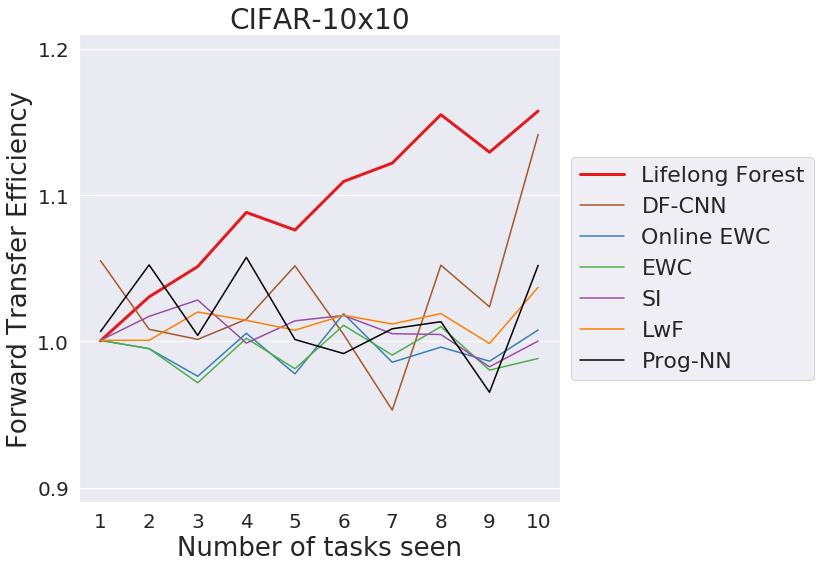

In [31]:
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
all_ftes = [fte_avg[4], fte_avg[6], fte_avg[1], fte_avg[0], fte_avg[2], fte_avg[3], fte_avg[5]]
plot_fte(all_ftes,names,std_dev)

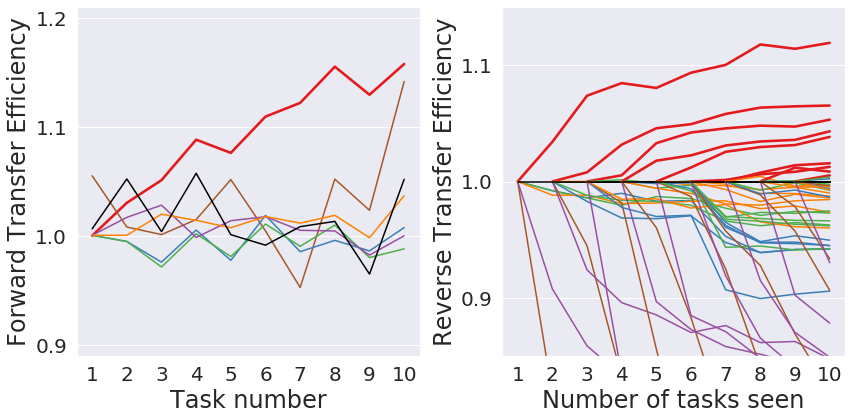

In [86]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=24
ticksize=20

fig, ax = plt.subplots(1,2, figsize=(12,6))
# plt.subplots_adjust(right=0.5)
items = []
for i, fte in enumerate(all_ftes):
    if i == 0:
        ax[0].plot(np.arange(1,11), fte, c=clr[i], label=algos[i], linewidth=2.6)
        continue

    item = ax[0].plot(np.arange(1,11), fte, c=clr[i], label=algos[i])
    items.append(item)
    
ax[0].set_xticks(np.arange(1,11))
ax[0].set_yticks([0.9, 1.0, 1.1, 1.2])
ax[0].set_ylim(0.89, 1.21)
ax[0].tick_params(labelsize=ticksize)
# ax[0].legend(algos, loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax[0].set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
ax[0].set_xlabel('Task number', fontsize=fontsize)

ax[0].grid(axis='x')

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(eta[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[1].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[1].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        else:
            if i == 0:
                ax[1].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[1].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1].set_ylabel('Reverse Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax[1].set_yticks([.4,.6,.8,.9,1, 1.1])
ax[1].set_xticks(np.arange(1,11))
ax[1].set_ylim(0.85, 1.15)
ax[1].tick_params(labelsize=ticksize)
ax[1].grid(axis='x')
plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('fte_bte_wide.png', dpi=500)

In [558]:
e = unpickle('./crossval_res_singletask/DF_CNN__1.pickle')
print(e[0:100])

FileNotFoundError: [Errno 2] No such file or directory: './crossval_res_singletask/DF_CNN__1.pickle'

In [967]:
'''e = unpickle('./crossval_res_singletask/DF_CNN1__2.pickle')
print(e)'''

"e = unpickle('./crossval_res_singletask/DF_CNN1__2.pickle')\nprint(e)"

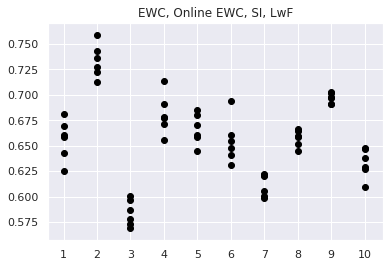

In [560]:
#calculate average single task error
cv = 6
tasks = 10
mean_single_err_4 = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
        #c = sns.color_palette(clr, n_colors=len(clr))
        #print(filename,err)
        plt.scatter(task+1,err,color='black')
        
plt.title('EWC, Online EWC, SI, LwF')
plt.xticks(np.arange(1,11))
plt.show()

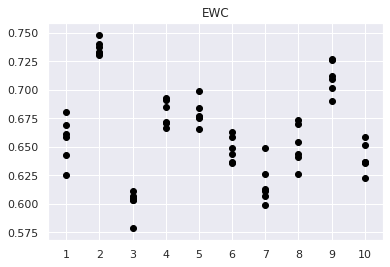

In [561]:
algs = ["EWC"]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(filename,res)
            plt.scatter(i+1,res[i],color='black')

plt.title('EWC')
plt.xticks(np.arange(1,11))
plt.show()

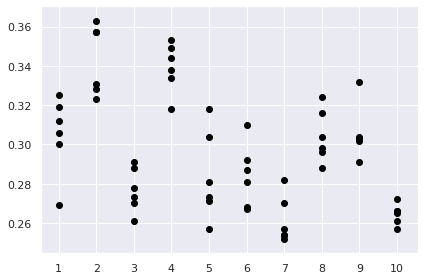

In [963]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            #print(err,task)
            plt.scatter(task+1,err,color='black')
            
plt.xticks(np.arange(1,11))
plt.show()

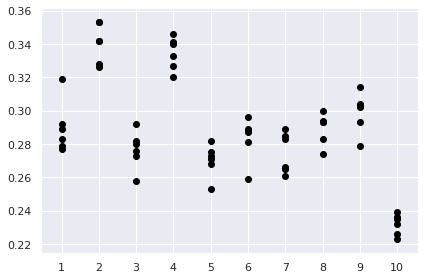

In [964]:
epoch_indx = list(range(100,1100,100))

for cv_ in range(cv):
    filename = './crossval_res/DF_CNN__'+str(cv_+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    #print(err)
    for i in range(10):
        #print(err[i])
        #print(err[i][i],i)
        plt.scatter(i+1,err[i][i],color='black')
        
plt.xticks(np.arange(1,11))
plt.show()

In [564]:
fte_avg[6]

array([1.05524436, 1.00833467, 1.00141443, 1.01517268, 1.05171902,
       1.00475894, 0.95303455, 1.05217348, 1.02367382, 1.14158801])

> Calculate TE

In [4]:
cv = 6
tasks = 10
mean_single_err = np.zeros(10,dtype=float)

for task in range(tasks):
    for cv_ in range(cv):
        filename = './crossval_res_singletask/single_task'+str(task+1)+'__'+str(cv_+1)+'.pickle'
        err = unpickle(filename)
        #print(err,task,mean_single_err[task])
        mean_single_err[task] += err
        
    mean_single_err[task] = mean_single_err[task]/cv
    
print(mean_single_err)

[0.65633333 0.73333333 0.58416667 0.68116667 0.66666667 0.655
 0.61133333 0.65766667 0.697      0.633     ]


In [5]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
tes = [[[[] for i in range(10)] for j in range(6)] for ii in range(7)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(mean_single_err[i])
            #print(res, "hi")
            for j in range(i+1):
                tes[ii][cv_][j].append(val[j]/res[j])
                #print(alg,cv_)
        #print(btes)
            

In [6]:
mean_single_error_LF = np.zeros(10,dtype=float)

for cv_ in range(cv):
    filename = './crossval_res_singletask/LF_single_task__'+str(cv_+1)+'.pickle'
    err = unpickle(filename)
    mean_single_error_LF += err
    
mean_single_error_LF = mean_single_error_LF/6
mean_single_error_LF

array([0.62033333, 0.67133333, 0.59883333, 0.65183333, 0.60766667,
       0.59033333, 0.5555    , 0.61483333, 0.654     , 0.57133333])

In [7]:
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    
    for j in range(10):
        for jj in range(10-j):
            tes[4][i][j].append(mean_single_error_LF[j]/err[jj+j][j])

In [8]:
mean_single_err_2 = np.zeros((2,10),dtype=float)
algs = ['DF_CNN', 'Prog_NN']

for ii, alg in enumerate(algs):
    for task in range(tasks):
        for cv_ in range(cv):
            filename = './crossval_res_singletask/'+alg+str(task+1)+'__'+str(cv_+1)+'.pickle'
            err = 1-unpickle(filename)[99][0]
            mean_single_err_2[ii][task] += err  
        mean_single_err_2[ii][task] = mean_single_err_2[ii][task]/cv
        
mean_single_err_2[1][0]

0.2838333333333334

In [9]:
#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[5][i][j].append(mean_single_err_2[1][j]/err[jj+j][j]) 
 

for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            tes[6][i][j].append(mean_single_err_2[0][j]/err[jj+j][j]) 

In [10]:
mean_eta = [[[] for i in range(10)] for j in range(7)]


for alg in range(7):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(tes[alg][i][j])
        
        tmp=tmp/6
        mean_eta[alg][j].append(tmp)

In [81]:
alg = 6
tmp = np.zeros(10,dtype=float)

for i in range(10):
    tmp[i] = mean_eta[alg][i][0][9-i]

In [82]:
print(np.std(tmp)/np.sqrt(10), np.min(tmp), np.mean(tmp))

0.0772337135389292 0.3989655224063476 0.7496885968825594


In [11]:
eta= [mean_eta[4], mean_eta[6], mean_eta[1], mean_eta[0], mean_eta[2], mean_eta[3], mean_eta[5]]

In [12]:
te = {'LF':np.zeros(10,dtype=float), 'DF-CNN':np.zeros(10,dtype=float),'Online EWC':np.zeros(10,dtype=float), 'EWC':np.zeros(10,dtype=float), 'SI':np.zeros(10,dtype=float), 'LwF':np.zeros(10,dtype=float), 'Prog-NN':np.zeros(10,dtype=float)}

for count,name in enumerate(te.keys()):
    for i in range(10):
        te[name][i] = eta[count][i][0][9-i]

In [22]:
import pandas as pd
df = pd.DataFrame.from_dict(te)
df_ = pd.melt(df,var_name='Algorithms', value_name='Transfer Efficieny')
#ax = sns.stripplot(x="day", y="total_bill", data=tips)
print(df_)

Algorithms  Transfer Efficieny
0          LF            1.119554
1          LF            1.097135
2          LF            1.106845
3          LF            1.135035
4          LF            1.117169
..        ...                 ...
65    Prog-NN            0.991733
66    Prog-NN            1.008675
67    Prog-NN            1.013511
68    Prog-NN            0.965276
69    Prog-NN            1.052027

[70 rows x 2 columns]


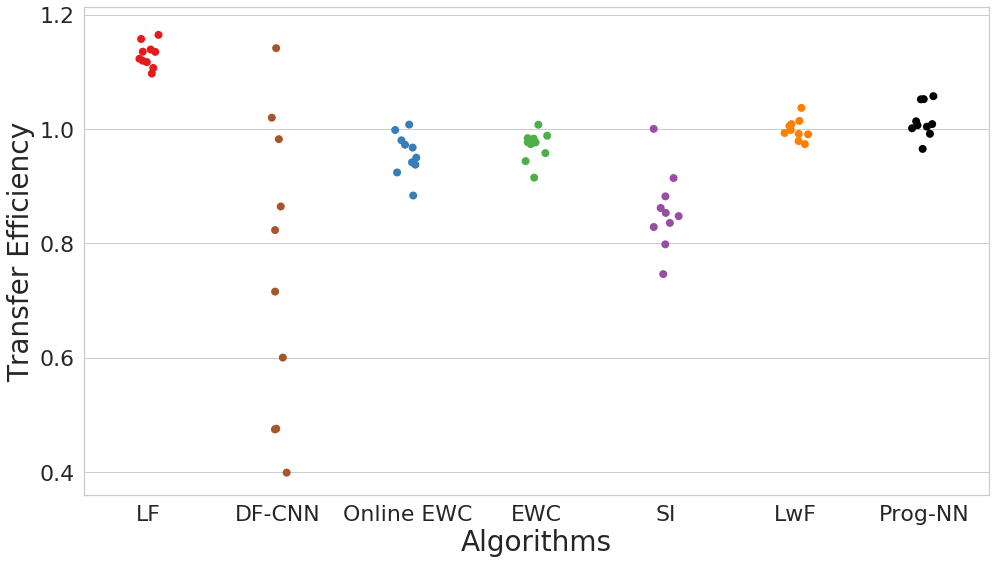

In [39]:
import seaborn as sns
sns.set(style="whitegrid")
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=8, ax=ax)
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=28)
ax_.set_ylabel('Transfer Efficiency', fontsize=28)
plt.savefig('TE.png', dpi=500)

In [47]:
alg = 6
tmp_min = np.zeros(10,dtype=float)
tmp_cv = np.zeros(6,dtype=float)
tmp_std = 0

for cv_ in range(6):
    for i in range(10):
        tmp_min = tes[alg][cv_][i][9-i]
    tmp_cv[cv_] = np.min(tmp_min)

print(np.round(np.std(tmp_cv)/np.sqrt(6),2))

NameError: name 'tes' is not defined

In [48]:
algs = ["EWC", "Online_EWC", "SI", "LwF"]
errs = [[[[] for i in range(10)] for j in range(6)] for ii in range(7)]
cv = 6

for ii,alg in enumerate(algs):
    for cv_ in range(cv):
        val = []
        for i in range(10):
            filename = './crossval_res/'+alg+str(i+1)+'__'+str(cv_+1)+'.pickle'
            #print(filename)
            res = unpickle(filename)
            #print(res)
            val.append(res[i])
            #print(res, "hi")
            for j in range(i+1):
                errs[ii][cv_][j].append(res[j])
                #print(alg,cv_)
        #print(btes)
            
#code for bte of LF

for i in range(cv):
    filename = './crossval_res/LF__'+str(i+1)+'.pickle'
    err = unpickle(filename)
    #eta = [[] for i in range(10)]
    
    '''for j in range(10):
        for jj in range(j+1):
            #eta[j][jj] = err[jj][jj]/err[j][jj]
            eta[j].append(err[jj][jj]/err[j][jj])'''
    
    for j in range(10):
        for jj in range(10-j):
            errs[4][i][j].append(err[jj+j][j])


#code for Prog-NN & DF-CNN
epoch_indx = list(range(100,1100,100))

for i in range(cv):
    filename = './crossval_res/Prog_NN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            errs[5][i][j].append(err[jj+j][j]) 


for i in range(cv):
    filename = './crossval_res/DF_CNN__'+str(i+1)+'.pickle'
    err = 1 - np.asarray(unpickle(filename))
    err = err[epoch_indx,:]
    
    for j in range(10):
        for jj in range(10-j):
            errs[6][i][j].append(err[jj+j][j]) 



In [49]:
mean_err = [[[] for i in range(10)] for j in range(7)]


for alg in range(7):
    for j in range(10):
        tmp = 0
        for i in range(6):
            tmp += np.array(errs[alg][i][j])
        
        tmp=tmp/6
        mean_err[alg][j].append(tmp)

#print(mean_eta)

In [50]:
def plot_e_all(ttle, eta, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
    c = sns.color_palette(clr, n_colors=n_alg)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            #print(eta[j])
            et[j,:] = np.asarray(eta[j][i])
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            #sd = np.asarray(std[j][i])
            #print(et[j,:]+1.96*sd/np.sqrt(6))
            if j == 0:
                if i == 0:
                    ax.plot(ns, 1-et[j,:], label = alg_name[j], c=c[j], linewidth = 3)
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
                else:
                    ax.plot(ns, 1-et[j,:], c=c[j], linewidth = 2.6)
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
            else:
                if i == 0:
                    ax.plot(ns, 1-et[j,:], label = alg_name[j], c=c[j])
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
                else:
                    ax.plot(ns, 1-et[j,:], c=c[j])
                    #ax.fill_between(ns, (et[j,:]+1.96*sd/np.sqrt(6))[0], (et[j,:]-1.96*sd/np.sqrt(6))[0],
                    #               facecolor=c[j],alpha=0.15, interpolate=True)
    
    
    ax.set_title(ttle, fontsize=28)
    ax.set_xlabel('Number of tasks seen', fontsize=26)
    ax.set_ylabel('Accuracy', fontsize=26)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc='upper left', fontsize=26)
    #ax.set_yticks([.4,.6,.8,.9,1, 1.1])
    #ax.set_ylim(0.85, 1.15)
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=20)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-accuracy.pdf')

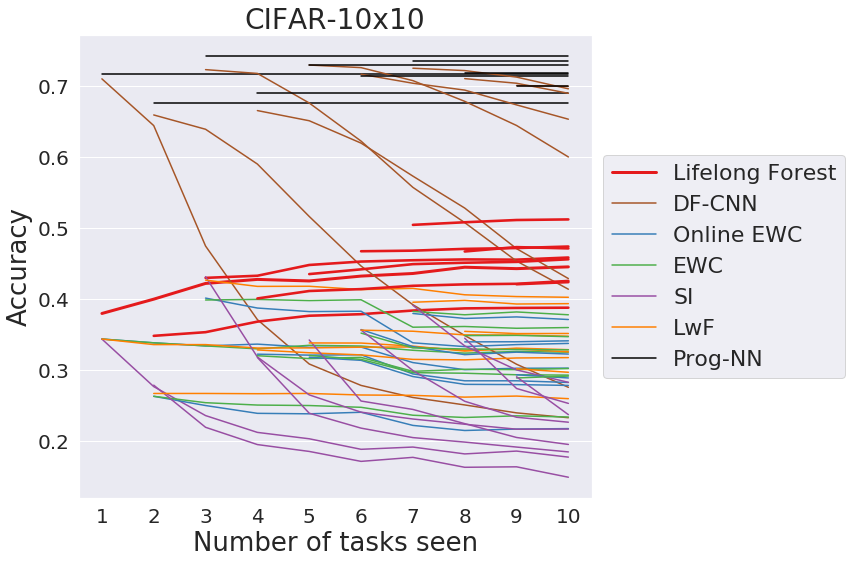

In [51]:
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
mean_e = [mean_err[4], mean_err[6], mean_err[1], mean_err[0], mean_err[2], mean_err[3], mean_err[5]]
#print(mean_e)
plot_e_all('CIFAR-10x10',mean_e,10,7,names)

In [44]:
mean_rte[6]

[[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1., 1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1., 1.])],
 [array([1., 1., 1., 1.])],
 [array([1., 1., 1.])],
 [array([1., 1.])],
 [array([1.])]]